### IMPORTING LIBRARIES FOR EDA



In [1]:
#loading basic libraries for EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING DATASET AND BASIC INFO 


In [2]:
#Loading dataset in the environment
data= pd.read_csv("Insurance_Dataset.csv")

In [3]:
#Shape of data is 1048575 entries and 24 columns
data.shape   

(1048575, 24)

In [ ]:
#column names 
for i,j in enumerate(data.columns):
  print(i,j, sep="\t",end="\n")

0	Area_Service
1	Hospital County
2	Hospital Id
3	Age
4	Gender
5	Cultural_group
6	ethnicity
7	Days_spend_hsptl
8	Admission_type
9	Home or self care,
10	ccs_diagnosis_code
11	ccs_procedure_code
12	apr_drg_description
13	Code_illness
14	Mortality risk
15	Surg_Description
16	Weight_baby
17	Abortion
18	Emergency dept_yes/No
19	Tot_charg
20	Tot_cost
21	ratio_of_total_costs_to_total_charges
22	Result
23	Payment_Typology


In [ ]:
for i,j in enumerate(data.columns):
  print(i,j)


0 Area_Service
1 Hospital County
2 Hospital Id
3 Age
4 Gender
5 Cultural_group
6 ethnicity
7 Days_spend_hsptl
8 Admission_type
9 Home or self care,
10 ccs_diagnosis_code
11 ccs_procedure_code
12 apr_drg_description
13 Code_illness
14 Mortality risk
15 Surg_Description
16 Weight_baby
17 Abortion
18 Emergency dept_yes/No
19 Tot_charg
20 Tot_cost
21 ratio_of_total_costs_to_total_charges
22 Result
23 Payment_Typology


In [ ]:
data.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [ ]:
data.dtypes.value_counts()

object     13
int64       6
float64     5
dtype: int64

###MAKING COPY OF ORG DATA 


In [ ]:
#making copy of orginal dataframe
data1=data.copy().reset_index(drop=True)

In [ ]:
data1.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


###DUPLICATES HANDLING


In [ ]:
#data set is huge checking for duplicates 
#Count of Duplicate entries
data1[data1.duplicated()].shape[0]
dup=data1[data1.duplicated()].shape[0]/data1.shape[0]*100
print("%of duplicate entries:",round(dup,3)) ##4814 entries

%of duplicate entries: 0.459


In [ ]:
#Droping duplicates from the data
data1.drop_duplicates(inplace=True)
 


In [ ]:
data1.reset_index(inplace=True,drop=True)


In [ ]:
#New data after removing duplicates
data1.shape

(1043761, 24)

###RENAMING COLUMNS

In [ ]:
#renaming some columns for ease of operation
data1 = data1.rename({'Hospital County': 'Hosp_County', 'Hospital Id':'Hosp_Id','Cultural_group':"Cultural_Group"}, axis=1)
data1=data1.rename({'ethnicity':'Ethnicity','Days_spend_hsptl':'Days_Spend_Hosp', 'Admission_type':'Admit_Type' },axis=1)
data1=data1.rename({'Home or self care,':'Home_Or_Selfcare','Code_illness':'Code_Illness', 'Mortality risk':'Mortality_Risk' },axis=1)
data1=data1.rename({'Emergency dept_yes/No':'Emergency_Dept'},axis=1)

In [ ]:
data1.head()

,Area_Service,Hosp_County,Hosp_Id,Age,Gender,Cultural_Group,Ethnicity,Days_Spend_Hosp,Admit_Type,Home_Or_Selfcare,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_Illness,Mortality_Risk,Surg_Description,Weight_baby,Abortion,Emergency_Dept,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


###TARGET VARIABLE DESCRIPTIVE ANALYSIS


In [ ]:
#Data target variable counts in Result column
#0 -Fraudulent
#1 - Genuine
for i,j in enumerate(data1.Result.value_counts()):
  print(i,j,sep="\t",end="\n") ##1-786407 0-262168

0	786407
1	262168


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


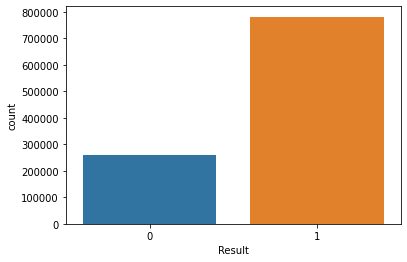

In [ ]:
#Visualization of Fraudulwnt and genuine claims
sns.countplot("Result",data=data1)
plt.show()

###MISSING VALUES/NULL VALUES ANALYSIS 

In [ ]:
#Null Values
e=0
for i,j in enumerate(data1.isnull().sum()):
  if(j>0):
    print(data.iloc[:,i].name,j,sep="\t",end="\n")
    e=e+j
    print("In Percentage:",round(j/data.shape[0],3)*100)
print("Total Null Entries:",e)




Area_Service	2456
In Percentage: 0.2
Hospital County	2456
In Percentage: 0.2
Hospital Id	2456
In Percentage: 0.2
Mortality risk	42
In Percentage: 0.0
Total Null Entries: 7410


In [ ]:
print("% missing values:",(data["Hospital County"].isnull().sum())/data["Hospital County"].shape[0]*100)

% missing values: 0.23422263548148678


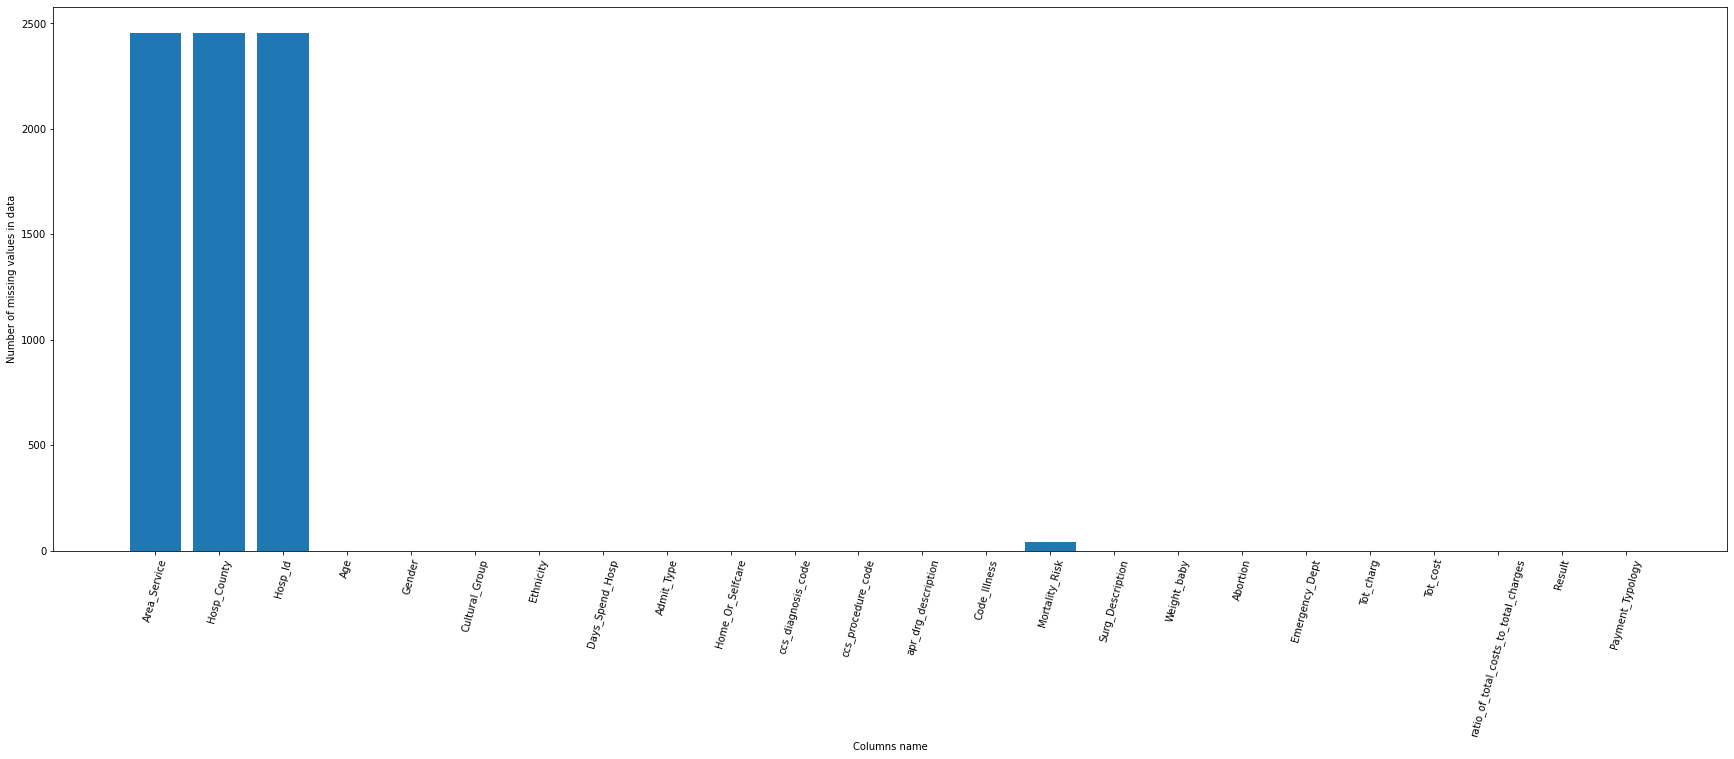

In [ ]:
#Visualization of missing values
plt.figure(figsize = (30,10))
plt.bar(data1.columns, data1.isnull().sum())
plt.xlabel("Columns name")
plt.xticks(rotation=75)
plt.ylabel("Number of missing values in data")
plt.show()

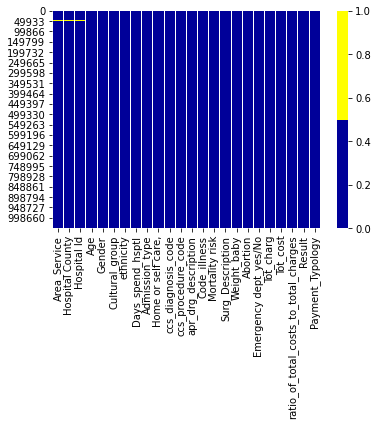

In [ ]:
#Null values display for orginal data 
cols =data.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(),cmap=sns.color_palette(colours))

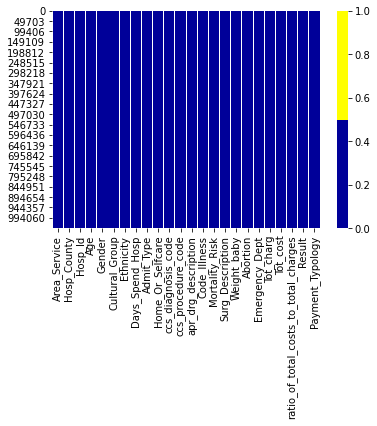

In [ ]:
#Null values display for duplicates removed  data 
cols =data1.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colours))

###PARAMETERS DESCRIPTIVE ANALYSIS

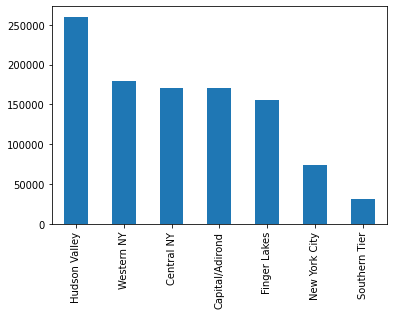

In [ ]:
#Bar plot
data1['Area_Service'].value_counts().plot.bar()

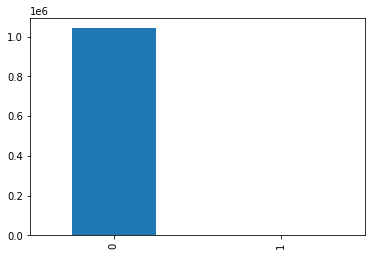

In [ ]:
data1.Area_Service.isnull().astype("int64").value_counts().plot.bar()
# 0 - not missing values
# 1- missing values

In [ ]:
data1=data.drop_duplicates().reset_index(drop=True)
data1[data1.Area_Service.isnull()=="True"].Area_Service=data1.Area_Service.mode()
    

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


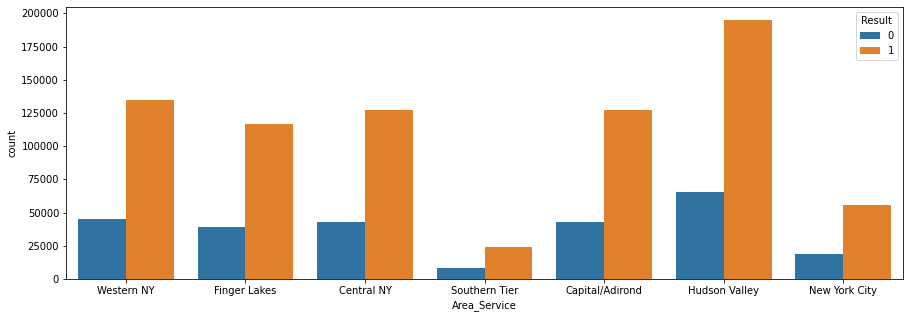

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("Area_Service",hue="Result",data=data.drop_duplicates())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


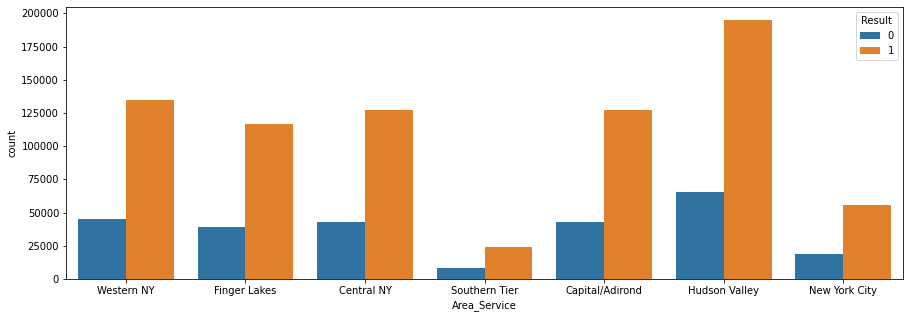

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("Area_Service",hue="Result",data=data1)

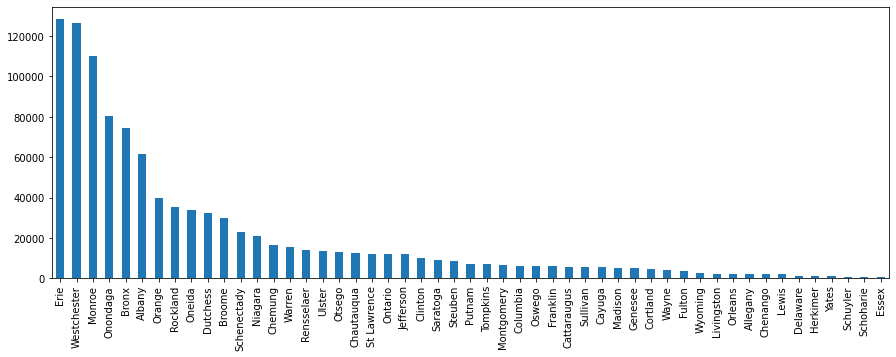

In [ ]:
plt.figure(figsize=(15,5))
data1["Hosp_County"].value_counts().plot.bar() # 

In [ ]:
data1.Hosp_County.unique().shape[0] #total 51 

52

In [ ]:
data1["Hosp_Id"].unique().shape[0]  # 143 we can drop it as it is just reference no.

144

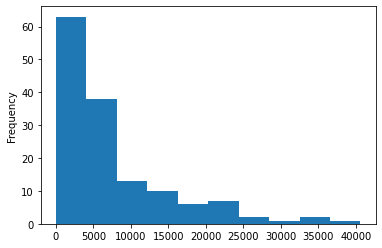

In [ ]:
data1["Hosp_Id"].value_counts().plot.hist()

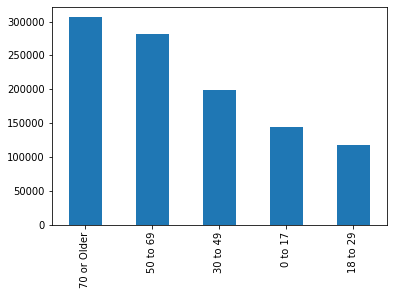

In [ ]:
data["Age"].value_counts().plot.bar() ##5 categories
#70 or Older    306017
#50 to 69       282013
#30 to 49       198827
#0 to 17        144607
#18 to 29       11711

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


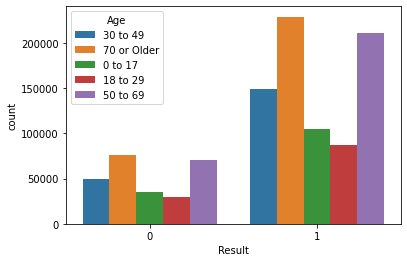

In [ ]:
#Visualizing the Fraudulent or Genuine claims
sns.countplot('Result', hue="Age" ,data = data1)
plt.show()

In [ ]:
data1["Gender"].value_counts() 
#F    593506
#M    455019
#U        50

F    590556
M    453155
U        50
Name: Gender, dtype: int64

In [ ]:
data1[data1["Gender"]=="U"] # 50 entries 

In [ ]:
data1[data1["Gender"]=="U"].isnull().sum()  #### 23 entries having null values

Area_Service                             23
Hosp_County                              23
Hosp_Id                                  23
Age                                       0
Gender                                    0
Cultural_Group                            0
Ethnicity                                 0
Days_Spend_Hosp                           0
Admit_Type                                0
Home_Or_Selfcare                          0
ccs_diagnosis_code                        0
ccs_procedure_code                        0
apr_drg_description                       0
Code_Illness                              0
Mortality_Risk                            0
Surg_Description                          0
Weight_baby                               0
Abortion                                  0
Emergency_Dept                            0
Tot_charg                                 0
Tot_cost                                  0
ratio_of_total_costs_to_total_charges     0
Result                          

In [ ]:
(data1[data1["Gender"]=="U"].Weight_baby>0).sum()

43

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


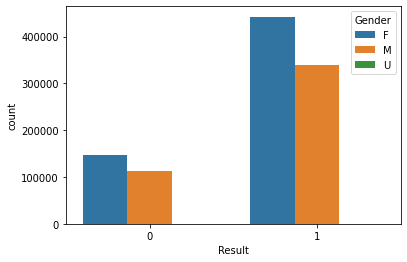

In [ ]:
#Visualizing the Fraudulent or Genuine claims
sns.countplot('Result', hue="Gender" ,data = data1)
plt.show()

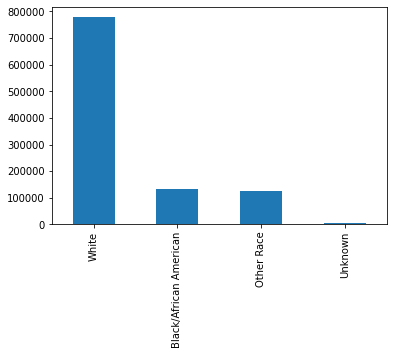

In [ ]:
 data1.Cultural_Group.value_counts().plot.bar() # 4 categories

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


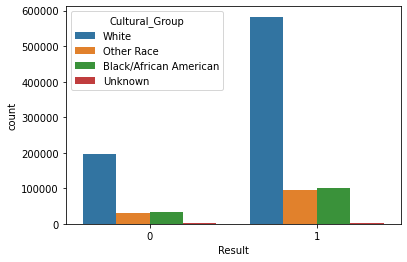

In [ ]:
#Visualizing the Fraudulent or Genuine claims
sns.countplot('Result', hue="Cultural_Group" ,data = data1)
plt.show()

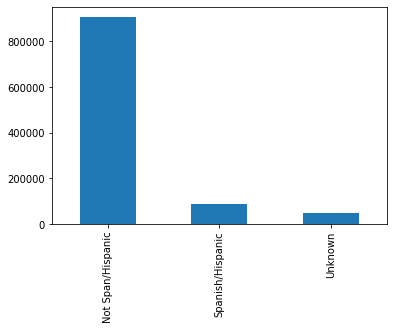

In [ ]:
data1["Ethnicity"].value_counts().plot.bar()
#Not Span/Hispanic    906388
#Spanish/Hispanic      87582
#Unknown               49791

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


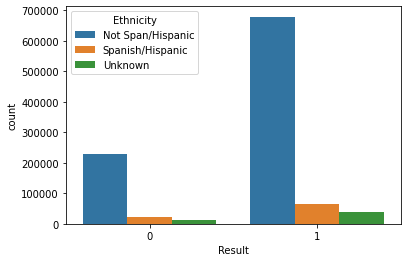

In [ ]:
sns.countplot("Result",hue="Ethnicity",data=data1)

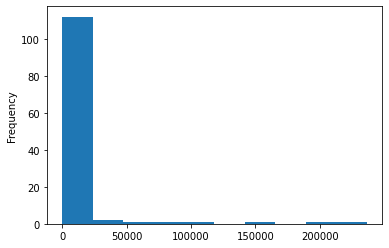

In [ ]:
data1.iloc[:,7].value_counts().plot.hist()

In [ ]:
"%s"%np.random.randint(121,150)

'137'

In [ ]:
data1[data1.iloc[:,7]=="120 +"].shape[0]

765

In [ ]:
data1[data1["Days_Spend_Hosp"]=="120 +"]

In [ ]:
for i in range(len(data1)):
  if(data1["Days_Spend_Hosp"][i]=="120 +"):
    data1["Days_Spend_Hosp"][i]="%s"%np.random.randint(121,150)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data1["Days_Spend_Hosp"]=data1["Days_Spend_Hosp"].astype(int)

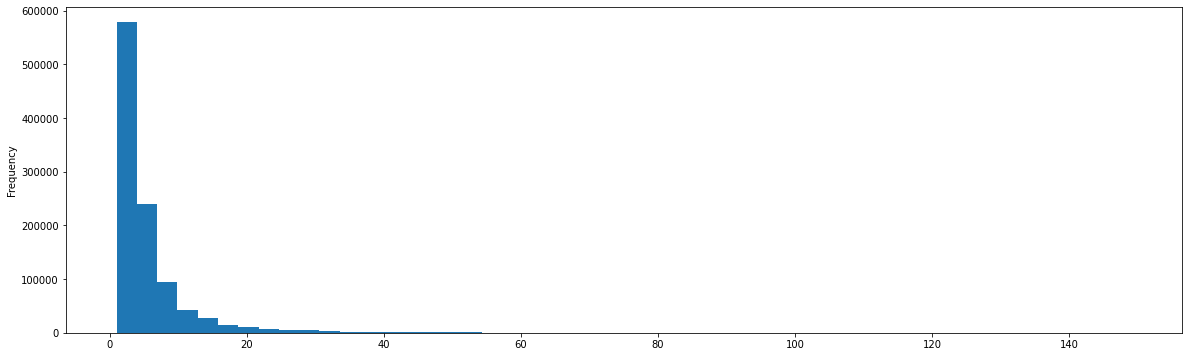

In [ ]:
plt.figure(figsize=(20,6))
data1["Days_Spend_Hosp"].plot.hist(bins=50)
#negatively skewed data

In [ ]:
print(data1["Days_Spend_Hosp"].corr(data1["Result"]))


-0.0006691423640615994


In [ ]:
data.corr()

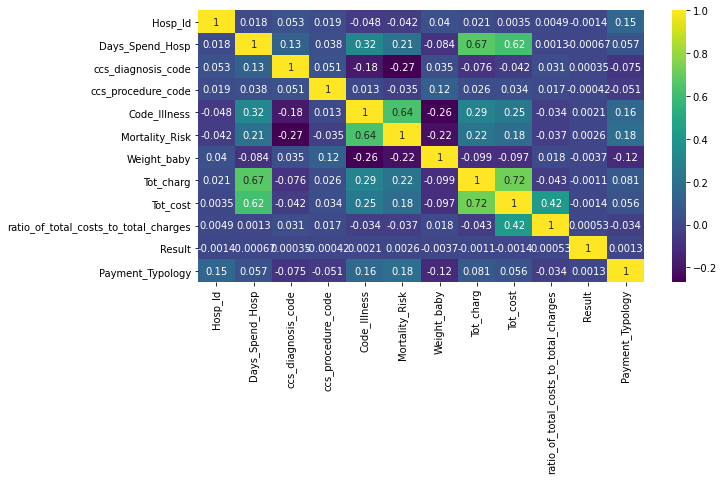

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data1.corr(), annot=True, cmap= 'viridis')

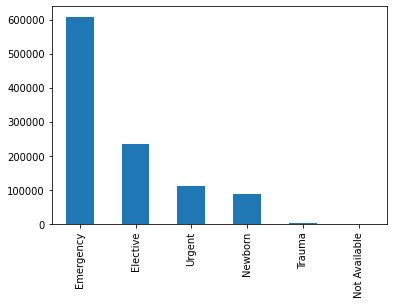

In [ ]:
data1.iloc[:,8].value_counts().plot.bar()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


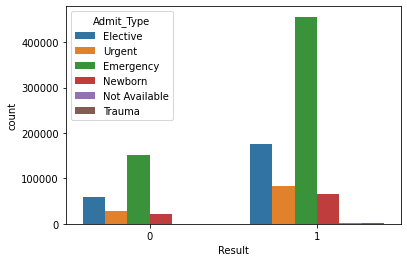

In [ ]:
sns.countplot("Result",hue="Admit_Type", data=data1)

In [ ]:
data1.columns

Index(['Area_Service', 'Hosp_County', 'Hosp_Id', 'Age', 'Gender',
       'Cultural_Group', 'Ethnicity', 'Days_Spend_Hosp', 'Admit_Type',
       'Home_Or_Selfcare', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_Illness', 'Mortality_Risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency_Dept',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

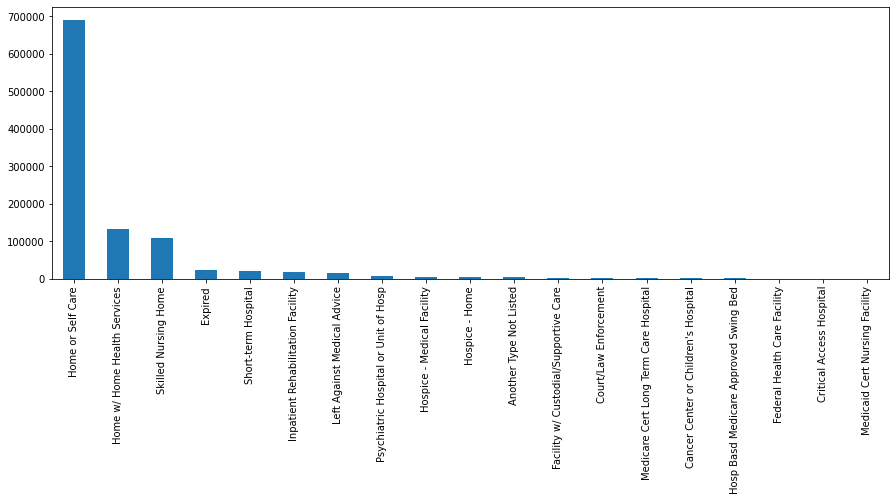

In [ ]:
plt.figure(figsize=(15,5))
data1['Home_Or_Selfcare'].value_counts().plot.bar()

In [ ]:
data1['Home_Or_Selfcare'].unique().shape[0]

19

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


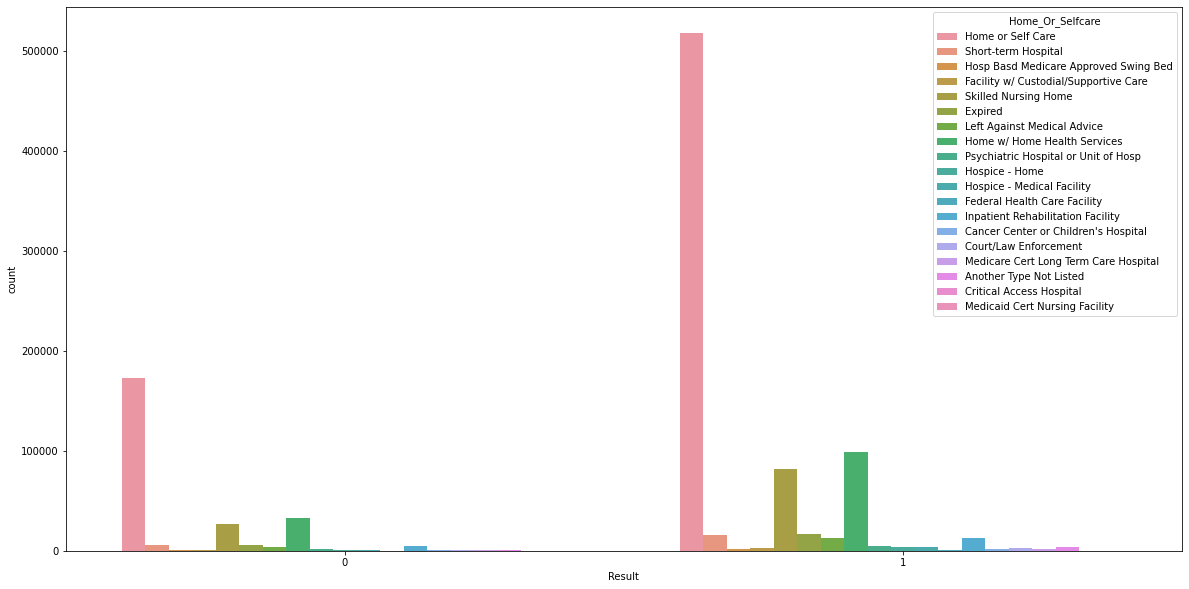

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot("Result",hue="Home_Or_Selfcare",data=data1)


In [ ]:
data["ccs_diagnosis_code"].describe().astype("int64")

count    1048575
mean         198
std          165
min            1
25%          108
50%          159
75%          218
max          670
Name: ccs_diagnosis_code, dtype: int64

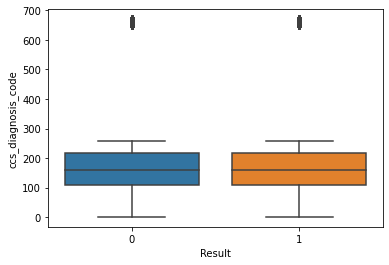

In [ ]:
sns.boxplot(x="Result", y="ccs_diagnosis_code", data=data1)

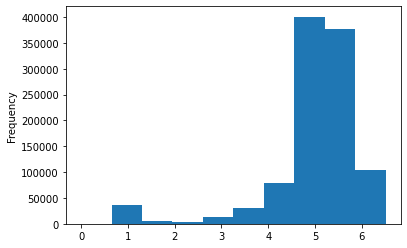

In [ ]:
np.log(data["ccs_diagnosis_code"]).plot.hist() ###positively skewed data

In [ ]:
data1['ccs_procedure_code'].describe().astype('int64')

count    1043761
mean          97
std           87
min            0
25%            0
50%           88
75%          172
max          231
Name: ccs_procedure_code, dtype: int64

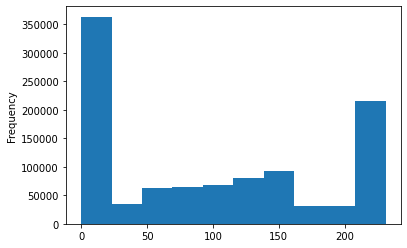

In [ ]:
(data1['ccs_procedure_code']).plot.hist()

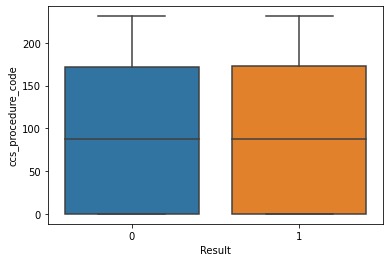

In [ ]:
sns.boxplot(x="Result", y='ccs_procedure_code', data=data1)

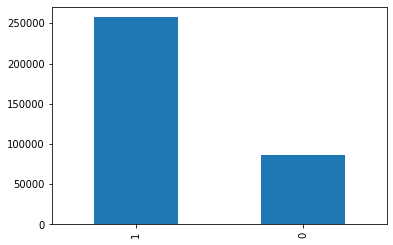

In [ ]:
data1[data1["ccs_procedure_code"]==0]["Result"].value_counts().plot.bar()

In [ ]:
data1.columns

Index(['Area_Service', 'Hosp_County', 'Hosp_Id', 'Age', 'Gender',
       'Cultural_Group', 'Ethnicity', 'Days_Spend_Hosp', 'Admit_Type',
       'Home_Or_Selfcare', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_Illness', 'Mortality_Risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency_Dept',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [ ]:
data1["apr_drg_description"].unique().shape[0]

316

In [ ]:
data1['Code_Illness'].unique()

array([1, 3, 2, 4, 0])

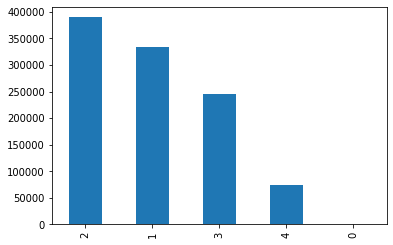

In [ ]:
data1['Code_Illness'].value_counts().plot.bar()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


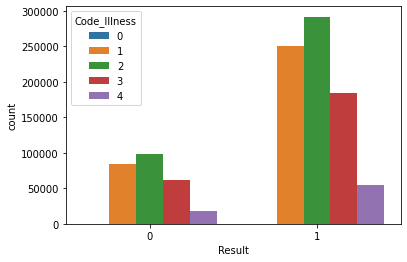

In [ ]:
sns.countplot("Result", hue="Code_Illness",data=data1)

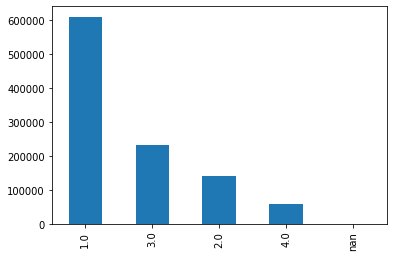

In [ ]:
data1["Mortality_Risk"].value_counts(dropna=False).plot.bar()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


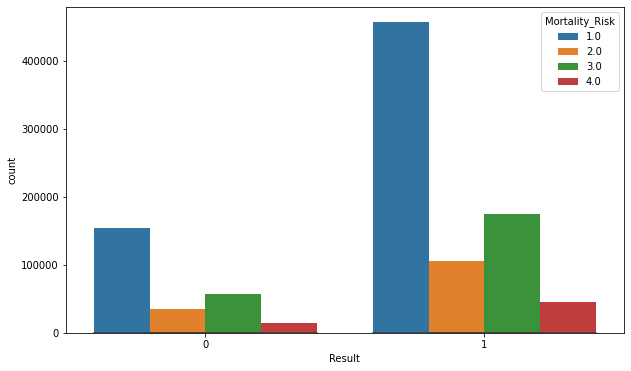

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Result",y="Mortality_Risk",data=data1)
sns.countplot("Result",hue="Mortality_Risk", data=data1)

In [ ]:
data1.columns

Index(['Area_Service', 'Hosp_County', 'Hosp_Id', 'Age', 'Gender',
       'Cultural_Group', 'Ethnicity', 'Days_Spend_Hosp', 'Admit_Type',
       'Home_Or_Selfcare', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_Illness', 'Mortality_Risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency_Dept',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [ ]:
data1["Surg_Description"].unique()

array(['Medical', 'Surgical', 'Not Applicable'], dtype=object)

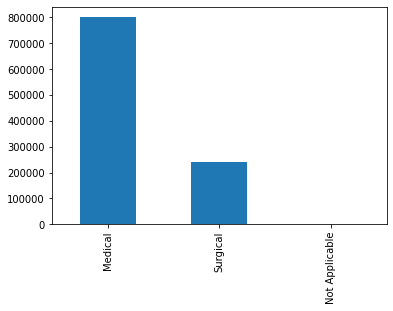

In [ ]:
data1["Surg_Description"].value_counts().plot.bar()

In [ ]:
d1=data1[data1["Surg_Description"]=="Not Applicable"]
d1.shape[0]

41

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


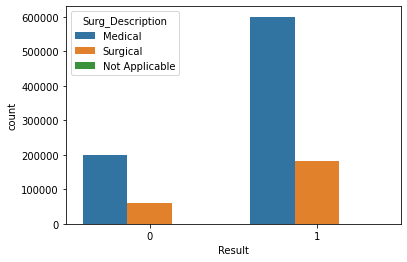

In [ ]:
sns.countplot("Result",hue="Surg_Description", data=data1)

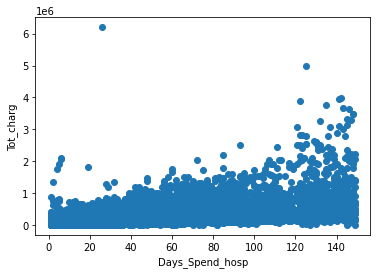

In [ ]:
#  'Tot_charg', 'To_cost'
plt.xlabel("Days_Spend_hosp")
plt.ylabel("Tot_charg")
plt.scatter(data1['Days_Spend_Hosp'],data1['Tot_charg'])
